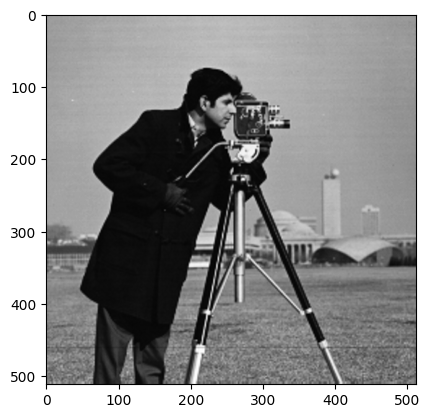

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# load cameraman.tif
data = mpimg.imread('cameraman.tif')
plt.imshow(data, cmap="gray")


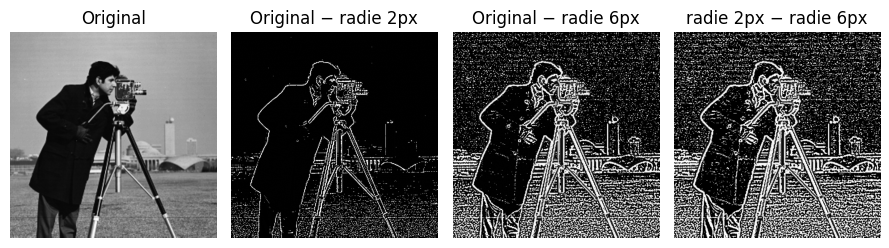

In [4]:
import scipy

blur1px = scipy.ndimage.gaussian_filter(data, 0.5)
blur3px = scipy.ndimage.gaussian_filter(data, 1.5)

f, axarr = plt.subplots(1, 4)
plt.axis("off")
f.set_size_inches(3*3, 3)

axarr[0].imshow(data, cmap="gray")
axarr[0].set_title("Original")
axarr[0].axis("off")

axarr[1].imshow(data - blur1px, cmap="gray")
axarr[1].set_title("Original − radie 2px")
axarr[1].axis("off")

axarr[2].imshow(data - blur3px, cmap="gray")
axarr[2].set_title("Original − radie 6px")
axarr[2].axis("off")

axarr[3].imshow(blur1px - blur3px, cmap="gray")
axarr[3].set_title("radie 2px − radie 6px")
axarr[3].axis("off")

plt.tight_layout()

# save as eps
plt.savefig("unsharpmasking.eps", format="eps", bbox_inches="tight", pad_inches=0)


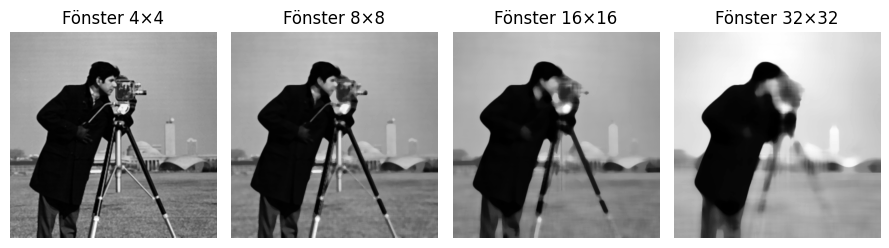

In [5]:
fig = plt.figure(figsize=(3*3, 3))
the_range = [4, 8, 16, 32]

for pos,i in enumerate(the_range):
    ax = fig.add_subplot(1, 4, pos+1)
    # blur = scipy.ndimage.gaussian_filter(data, i)
    blur = scipy.ndimage.median_filter(data, i)
    ax.imshow(blur, cmap="gray")
    ax.title.set_text("Fönster " + str(i) + "×" + str(i))
    ax.axis("off")

plt.tight_layout()

# save as eps
# plt.savefig("gausstheory.eps", format="eps", bbox_inches="tight", pad_inches=0)
plt.savefig("mediantheory.eps", format="eps", bbox_inches="tight", pad_inches=0)

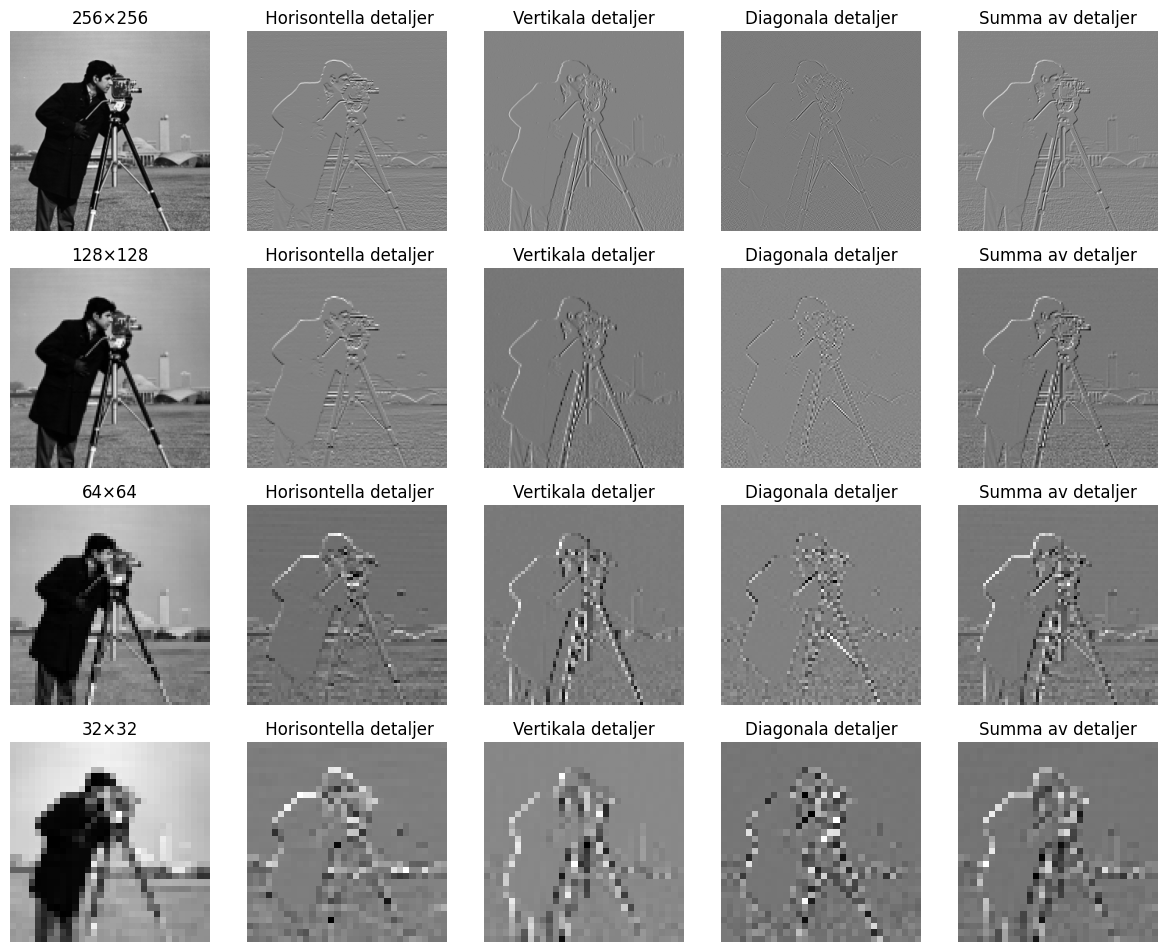

In [6]:
import pywt

# wavelet transform
titles = ['Approximation', ' Horisontella detaljer',
          'Vertikala detaljer', 'Diagonala detaljer']
fig = plt.figure(figsize=(12, 12))

LL = data

for level in range(1, 5):
    LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')

    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(5, 5, (level-1)*5+i + 1)
        ax.imshow(a, cmap="gray")

        if i == 0:
            ax.set_title(str(512//(2**level)) + "×" + str(512//(2**level)))
        else:
            ax.set_title(titles[i])
        ax.axis("off")

    ax = fig.add_subplot(5, 5, level*5)
    ax.imshow(LH+HL+HH, cmap="gray")
    ax.set_title("Summa av detaljer")
    ax.axis("off")


fig.tight_layout()
plt.savefig("wavelet.eps", format="eps", bbox_inches="tight", pad_inches=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


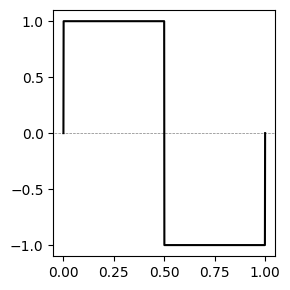

In [7]:
fig = plt.figure(figsize=(3, 3))

# plot Haar wavelet
waveletx = pywt.Wavelet('haar').wavefun(level=10)[1]
Y = np.linspace(0, 1, 2**10+2)

plt.plot(Y, waveletx, "-k")
plt.hlines(0, -1, 2, linestyles="dashed", colors="k", linewidth=0.5, alpha=0.5)
plt.xlim(-0.05, 1.05)
# plt.grid("on")
fig.tight_layout()
plt.savefig("haarwavelet.eps", format="eps", bbox_inches="tight", pad_inches=0)

C:\Users\Emrik\AppData\Local\Temp\ipykernel_6604\1898388676.py:31: RuntimeWarning: divide by zero encountered in log
  axarr[1][0].imshow(np.log(np.abs(fft_masked_high))/20, cmap='gray')


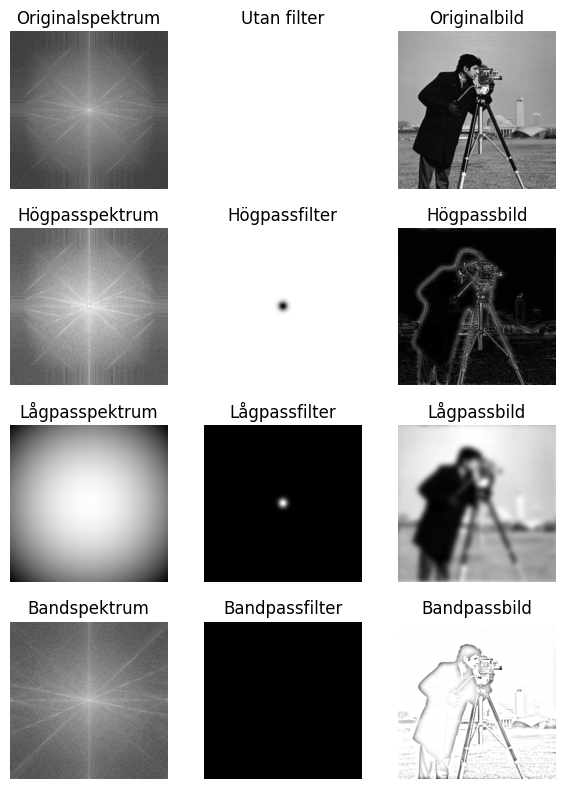

In [8]:
from astropy.convolution import Gaussian2DKernel

XSIZE, YSIZE = data.shape
    
radius = 10
mask1 = Gaussian2DKernel(x_stddev=radius, y_stddev=radius, x_size=XSIZE, y_size=YSIZE).array
mask1 = mask1 / np.max(mask1)
mask1 = mask1.clip(0, 1)
mask2 = (np.ones((512,512)) - mask1).clip(0, 1)

f, axarr = plt.subplots(4, 3)
plt.axis("off")
f.set_size_inches(6, 8)

# fourier transform
fft_shift = np.fft.fftshift(np.fft.fft2(data, axes=(0,1)))
mag = np.abs(fft_shift)
spec = np.log(mag) / 20
axarr[0][0].imshow(spec, cmap='gray') #spectrum
axarr[0][0].set_title("Originalspektrum")
axarr[0][0].axis("off")

axarr[0][2].imshow(data, cmap='gray')
axarr[0][2].set_title("Originalbild")
axarr[0][2].axis("off")


fft_masked_low = np.multiply(fft_shift, mask1)
fft_masked_high = np.multiply(fft_shift, mask2)

axarr[1][0].imshow(np.log(np.abs(fft_masked_high))/20, cmap='gray')
axarr[1][0].set_title("Högpasspektrum")
axarr[1][0].axis("off")

# lågpass spektrum
axarr[2][0].imshow(np.log(np.abs(fft_masked_low))/20, cmap='gray')
axarr[2][0].set_title("Lågpasspektrum")
axarr[2][0].axis("off")

# show all filters

axarr[0][1].imshow(np.ones((512,512)), cmap='gray', vmin=0, vmax=1)
axarr[0][1].set_title("Utan filter")
axarr[0][1].axis("off")

axarr[1][1].imshow(mask2, cmap='gray', vmax=1, vmin=0)
axarr[1][1].set_title("Högpassfilter")
axarr[1][1].axis("off")

axarr[2][1].imshow(mask1, cmap='gray', vmin=0, vmax=1)
axarr[2][1].set_title("Lågpassfilter")
axarr[2][1].axis("off")

axarr[3][1].imshow(-mask1-mask2+1, cmap='gray', vmin=0, vmax=1)
axarr[3][1].set_title("Bandpassfilter")
axarr[3][1].axis("off")


# plot beside each other
img_high_pass = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_masked_high)))
axarr[1][2].imshow(img_high_pass, cmap='gray')
axarr[1][2].set_title('Högpassbild')
axarr[1][2].axis("off")


img_low_pass = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_masked_low)))
axarr[2][2].imshow(img_low_pass, cmap='gray')
axarr[2][2].set_title('Lågpassbild')
axarr[2][2].axis("off")

img_band_pass = data-img_low_pass-img_high_pass
axarr[3][2].imshow(img_band_pass, cmap='gray')
axarr[3][2].set_title('Bandpassbild')
axarr[3][2].axis("off")

fft_shift = np.fft.fftshift(np.fft.fft2(img_band_pass, axes=(0,1)))
mag = np.abs(fft_shift)
spec = np.log(mag) / 20
axarr[3][0].imshow(spec, cmap='gray') #spectrum
axarr[3][0].set_title("Bandspektrum")
axarr[3][0].axis("off")

f.tight_layout()
plt.savefig("fourier.eps", format="eps", bbox_inches="tight", pad_inches=0)

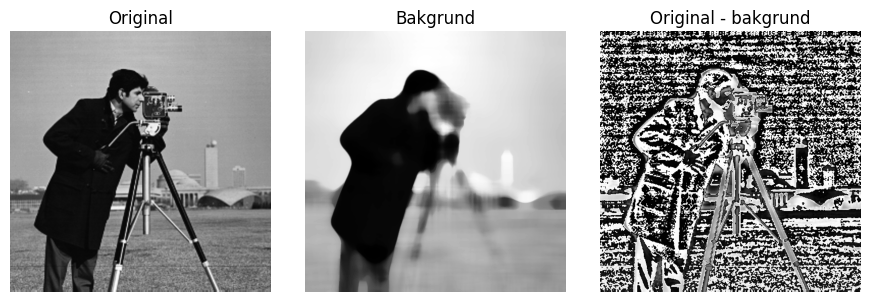

In [9]:
from photutils.background import Background2D, MedianBackground
from astropy.stats import SigmaClip

f, axarr = plt.subplots(1, 3)
plt.axis("off")
f.set_size_inches(3*3, 3)

bkg = Background2D(data, (16, 16), filter_size=(3, 3))
bkg2 = scipy.ndimage.median_filter(data, size=(32, 32))

print(bkg)

axarr[0].imshow(data, cmap='gray')
axarr[0].set_title("Original")
axarr[0].axis("off")

axarr[1].imshow(bkg2, cmap='gray')
axarr[1].set_title("Bakgrund")
axarr[1].axis("off")

axarr[2].imshow(data-bkg2, cmap='gray')
axarr[2].set_title("Original - bakgrund")
axarr[2].axis("off")

# axarr[3].imshow(bkg.background, cmap='gray')
# bkg.plot_meshes(outlines=True, marker='.', color='cyan')
# axarr[3].set_title("Kvadrater")
# axarr[3].axis("off")

f.tight_layout()
plt.savefig("medianbackgroundtheory.eps", format="eps", bbox_inches="tight", pad_inches=0)